In [ ]:
class Table:
    self.name=None
    self.typ=None
    self.creators=[]
    def __init__(self, name, typ):
        self.name = name
        self.typ = typ
    def add_dependant(self, name)

In [1]:
import pandas as pd

In [8]:
dependencies=pd.read_csv("./dependencies.csv", header=None)

In [9]:
def create_dep_ll(x, universal_ll):
    if x[0] not in universal_ll:
        universal_ll[x[0]] = []
    universal_ll[x[0]].append(x[1])

In [16]:
univ={}
trash=dependencies.apply(create_dep_ll,1, args=(univ,))

In [25]:
node_list=dependencies[1].tolist()

In [27]:
node_list+=dependencies[0].tolist()

In [29]:
len(set(node_list))

131

In [65]:
set(node_list)

{'`PatentsView`.`application`',
 '`PatentsView`.`assignee_cpc_group`',
 '`PatentsView`.`assignee_cpc_subsection`',
 '`PatentsView`.`assignee_inventor`',
 '`PatentsView`.`assignee_nber_subcategory`',
 '`PatentsView`.`assignee_uspc_mainclass`',
 '`PatentsView`.`assignee_year`',
 '`PatentsView`.`assignee`',
 '`PatentsView`.`cpc_current_group_application_year`',
 '`PatentsView`.`cpc_current_group_patent_year`',
 '`PatentsView`.`cpc_current_group`',
 '`PatentsView`.`cpc_current_subsection_patent_year`',
 '`PatentsView`.`cpc_current_subsection`',
 '`PatentsView`.`cpc_current`',
 '`PatentsView`.`examiner`',
 '`PatentsView`.`foreignpriority`',
 '`PatentsView`.`government_interest`',
 '`PatentsView`.`government_organization``',
 '`PatentsView`.`inventor_coinventor`',
 '`PatentsView`.`inventor_cpc_group`',
 '`PatentsView`.`inventor_cpc_subsection`',
 '`PatentsView`.`inventor_nber_subcategory`',
 '`PatentsView`.`inventor_uspc_mainclass`',
 '`PatentsView`.`inventor`',
 '`PatentsView`.`inventors`',

In [57]:
import networkx as nx
G=nx.DiGraph()

In [58]:
G.add_nodes_from(set(node_list))

In [59]:
tuples = [tuple(x) for x in dependencies.values]

In [60]:
G.add_edges_from(tuples)

In [61]:
G.number_of_edges()

203

In [38]:

import matplotlib.pyplot as plt

C:\Users\smadhavan\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\smadhavan\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\smadhavan\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\smadhavan\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarni

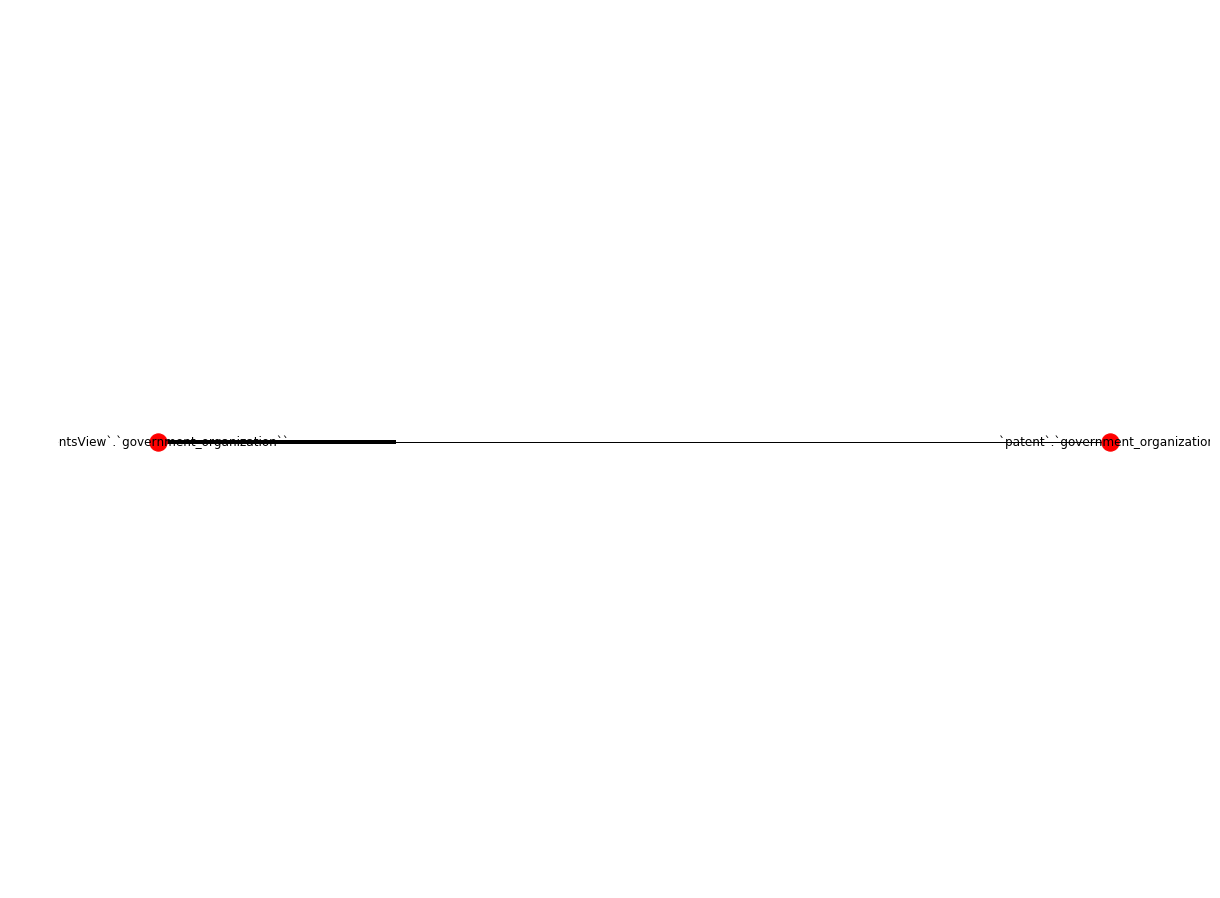

In [87]:
%matplotlib inline
plt.figure(3,figsize=(16,12)) 
nx.draw_shell(nx.bfs_tree(G,'`patent`.`government_organization`', reverse=False ), with_labels=True, figsize=(20,20))



In [45]:
%matplotlib inline
nx.draw(nx.clique(G), with_labels=True)

TypeError: 'module' object is not callable

In [91]:
UG=G.to_undirected()

In [99]:
reach={}
for node in nx.descendants(G,source="`patent`.`uspatentcitation`"):
    hops=str(nx.shortest_path_length(G, source="`patent`.`uspatentcitation`" ,target=node))
    #print(node+" : ")
    if hops not in reach:
        reach[hops]=[]
    reach[hops].append(node)

In [100]:
import pprint
pprint.pprint(reach)

{'1': ['`PatentsView`.`temp_num_us_patents_cited`',
       '`PatentsView`.`temp_num_times_cited_by_us_patents`'],
 '2': ['`PatentsView`.`temp_patent_aggregations`'],
 '3': ['`PatentsView`.`patent`'],
 '4': ['`PatentsView`.`temp_cpc_current_subsection_aggregate_counts`',
       '`PatentsView`.`temp_cpc_current_group_aggregate_counts`',
       '`PatentsView`.`usapplicationcitation`',
       '`PatentsView`.`uspc_current_mainclass_application_year`',
       '`PatentsView`.`cpc_current_subsection_patent_year`',
       '`PatentsView`.`pctdata`',
       '`PatentsView`.`patent_year`',
       '`PatentsView`.`cpc_current_group_application_year`',
       '`PatentsView`.`uspc_current_mainclass_patent_year`',
       '`PatentsView`.`foreignpriority`',
       '`PatentsView`.`temp_nber_subcategory_aggregate_counts`',
       '`PatentsView`.`uspatentcitation`',
       '`PatentsView`.`cpc_current_group_patent_year`',
       '`PatentsView`.`nber_subcategory_patent_year`',
       '`PatentsView`.`temp_ipcr_